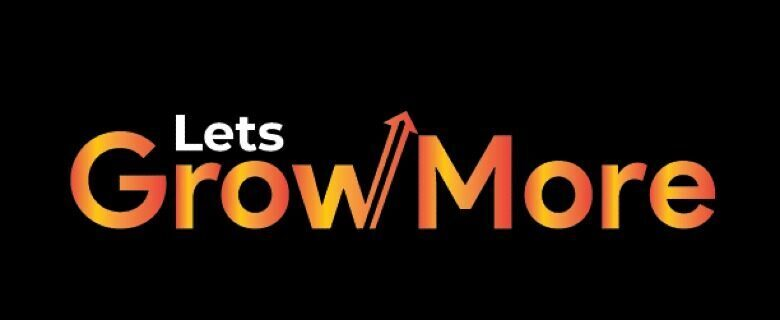

# <CENTER> <span style="color: red"><u>**Virtual Internship Program**</u></span></CENTER>

##  <span style="color:blue">  *Author :- Mohd Farman*</span>
##  <span style="color:blue">*Beginer Level Tasks*</span>

## Task 3 - Music Recommendation
By using music recommender system, the music provider can predict and then offer the appropriate songs to their users based on the characteristics of the music that has been heard previously.

Dataset:https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### Import libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [51]:
train = pd.read_csv('train.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [52]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [53]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [54]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [55]:
#basic info
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  -----

In [56]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [57]:
# get statistical summaries of dataset
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [58]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [59]:
train.shape

(7377418, 6)

In [60]:
songs.shape

(2296320, 7)

In [61]:
members.shape

(34403, 7)

### Visulization Of The Data

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

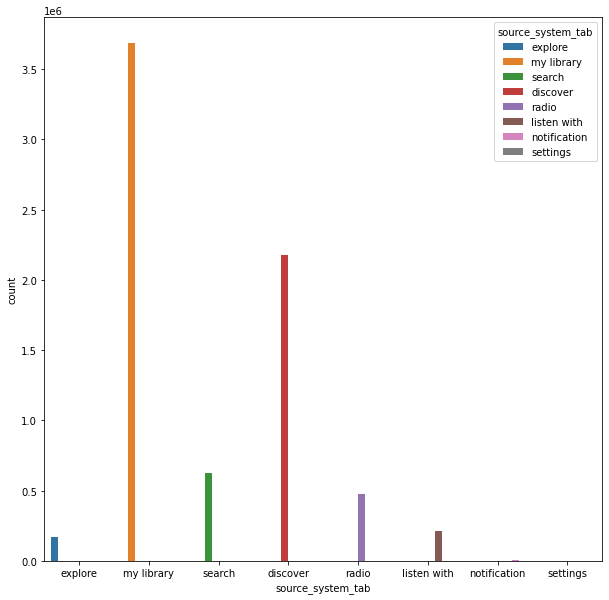

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

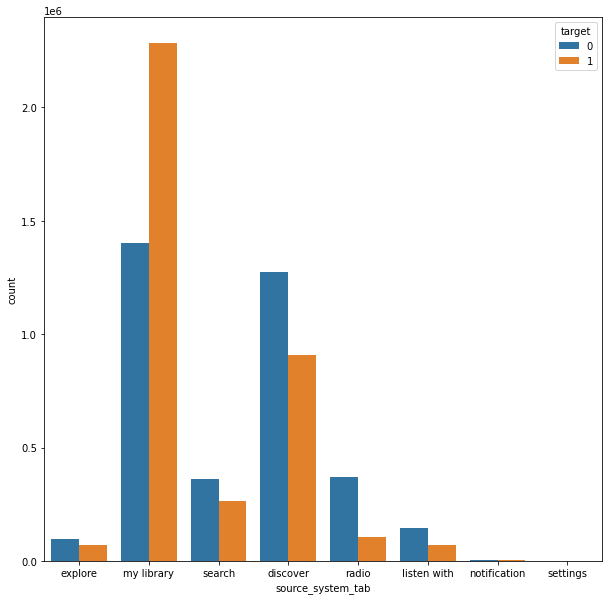

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

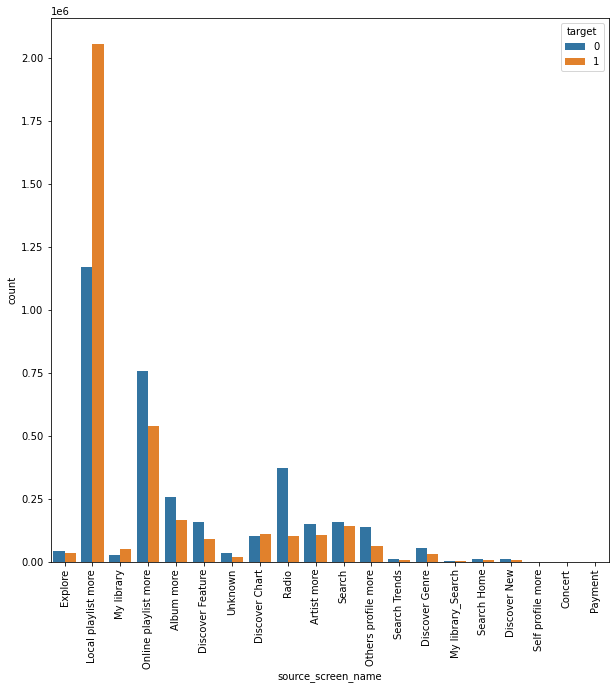

In [64]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)

<AxesSubplot:xlabel='source_type', ylabel='count'>

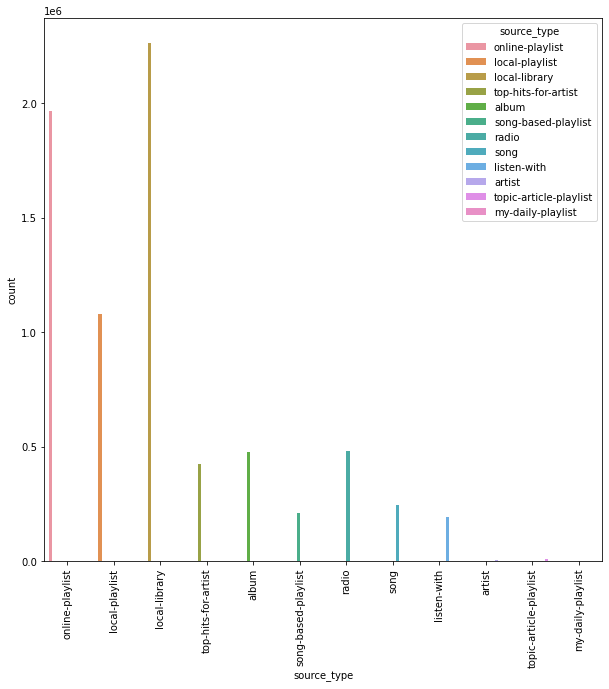

In [65]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)


<AxesSubplot:xlabel='source_type', ylabel='count'>

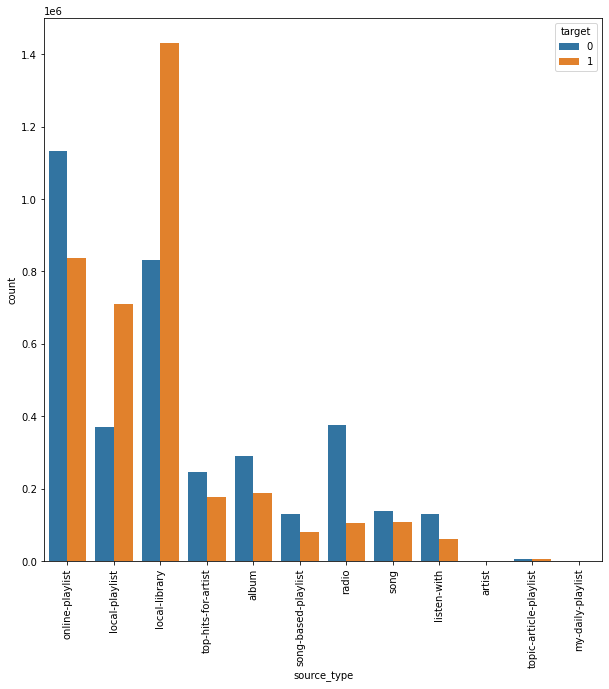

In [66]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)

<AxesSubplot:xlabel='language', ylabel='count'>

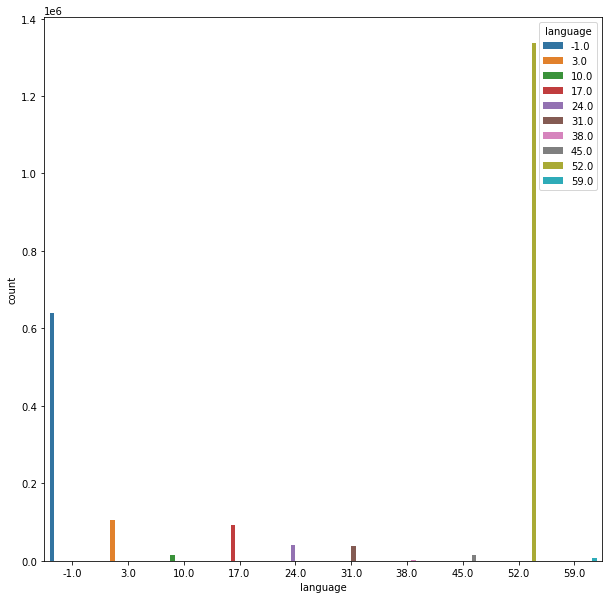

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(x='language', hue='language',data=songs)

<AxesSubplot:xlabel='registered_via', ylabel='count'>

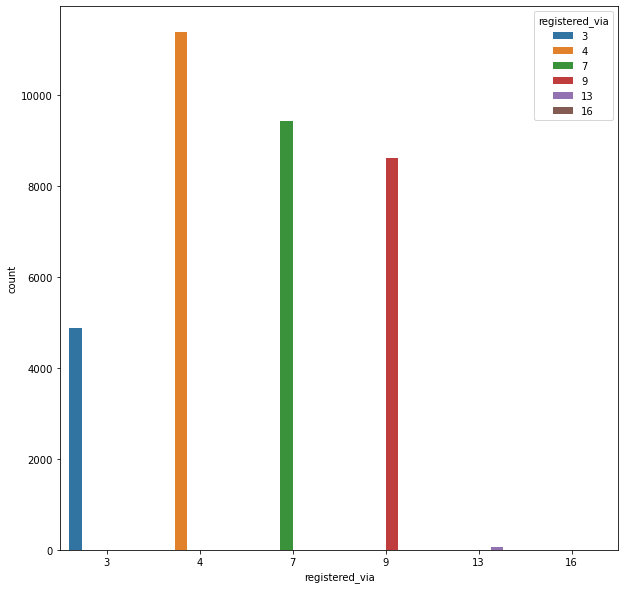

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(x='registered_via', hue='registered_via',data=members)

### Clean The Data

In [69]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)

In [70]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [71]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [72]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [73]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [74]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [75]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [76]:
train = train.fillna(-1)
test = test.fillna(-1)

In [77]:
import gc
del members, songs; gc.collect();


In [78]:
cols = list(train.columns)
cols.remove('target')

In [79]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:38<00:00,  2.01s/it]


In [80]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

### Build Model

In [81]:
pip install lightgbm


In [82]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]


MemoryError: Unable to allocate 1.04 GiB for an array with shape (7377418, 19) and data type float64

In [ ]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
predict(LogisticRegression())

### Prediction Using LightGBM

In [ ]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

In [ ]:
p_test = model1.predict(X_test)

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

# Thnak You..